### Importing neccessary libary

In [194]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from ucimlrepo import fetch_ucirepo 
  
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF


### Imoporting data from `ucimlrepo`

In [195]:

# fetch dataset 
automobile = fetch_ucirepo(id=10) 
  
# data (as pandas dataframes) 
X = automobile.data.features 
y = automobile.data.targets 
  
# metadata 
print(automobile.metadata) 
  
# variable information 
print(automobile.variables) 

{'uci_id': 10, 'name': 'Automobile', 'repository_url': 'https://archive.ics.uci.edu/dataset/10/automobile', 'data_url': 'https://archive.ics.uci.edu/static/public/10/data.csv', 'abstract': "From 1985 Ward's Automotive Yearbook", 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 205, 'num_features': 25, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['symboling'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1985, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5B01C', 'creators': ['Jeffrey Schlimmer'], 'intro_paper': None, 'additional_info': {'summary': 'This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars.  The second rating corresponds to the degree to which th

### EDA

In [196]:
# Fetch dataset
automobile = fetch_ucirepo(id=10)

In [197]:
# Convert features and targets to numeric values
features_df = pd.DataFrame(automobile.data.features)
targets_df = pd.DataFrame(automobile.data.targets)

features_df.head(10)

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,length,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,171.2,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,176.6,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,176.6,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0
5,15250.0,25,19,5500.0,110.0,8.5,3.40,3.19,mpfi,136,...,177.3,99.8,front,fwd,sedan,2.0,std,gas,audi,NaN
6,17710.0,25,19,5500.0,110.0,8.5,3.40,3.19,mpfi,136,...,192.7,105.8,front,fwd,sedan,4.0,std,gas,audi,158.0
7,18920.0,25,19,5500.0,110.0,8.5,3.40,3.19,mpfi,136,...,192.7,105.8,front,fwd,wagon,4.0,std,gas,audi,NaN
8,23875.0,20,17,5500.0,140.0,8.3,3.40,3.13,mpfi,131,...,192.7,105.8,front,fwd,sedan,4.0,turbo,gas,audi,158.0
9,NaN,22,16,5500.0,160.0,7.0,3.40,3.13,mpfi,131,...,178.2,99.5,front,4wd,hatchback,2.0,turbo,gas,audi,NaN


### Convert data to numberic numbers

In [198]:
X = features_df.apply(pd.to_numeric, errors='coerce').dropna(axis=1)
y = targets_df.apply(pd.to_numeric, errors='coerce').fillna(0)

X.head(10)

,highway-mpg,city-mpg,compression-ratio,engine-size,num-of-cylinders,curb-weight,height,width,length,wheel-base
0,27,21,9.0,130,4,2548,48.8,64.1,168.8,88.6
1,27,21,9.0,130,4,2548,48.8,64.1,168.8,88.6
2,26,19,9.0,152,6,2823,52.4,65.5,171.2,94.5
3,30,24,10.0,109,4,2337,54.3,66.2,176.6,99.8
4,22,18,8.0,136,5,2824,54.3,66.4,176.6,99.4
5,25,19,8.5,136,5,2507,53.1,66.3,177.3,99.8
6,25,19,8.5,136,5,2844,55.7,71.4,192.7,105.8
7,25,19,8.5,136,5,2954,55.7,71.4,192.7,105.8
8,20,17,8.3,131,5,3086,55.9,71.4,192.7,105.8
9,22,16,7.0,131,5,3053,52.0,67.9,178.2,99.5


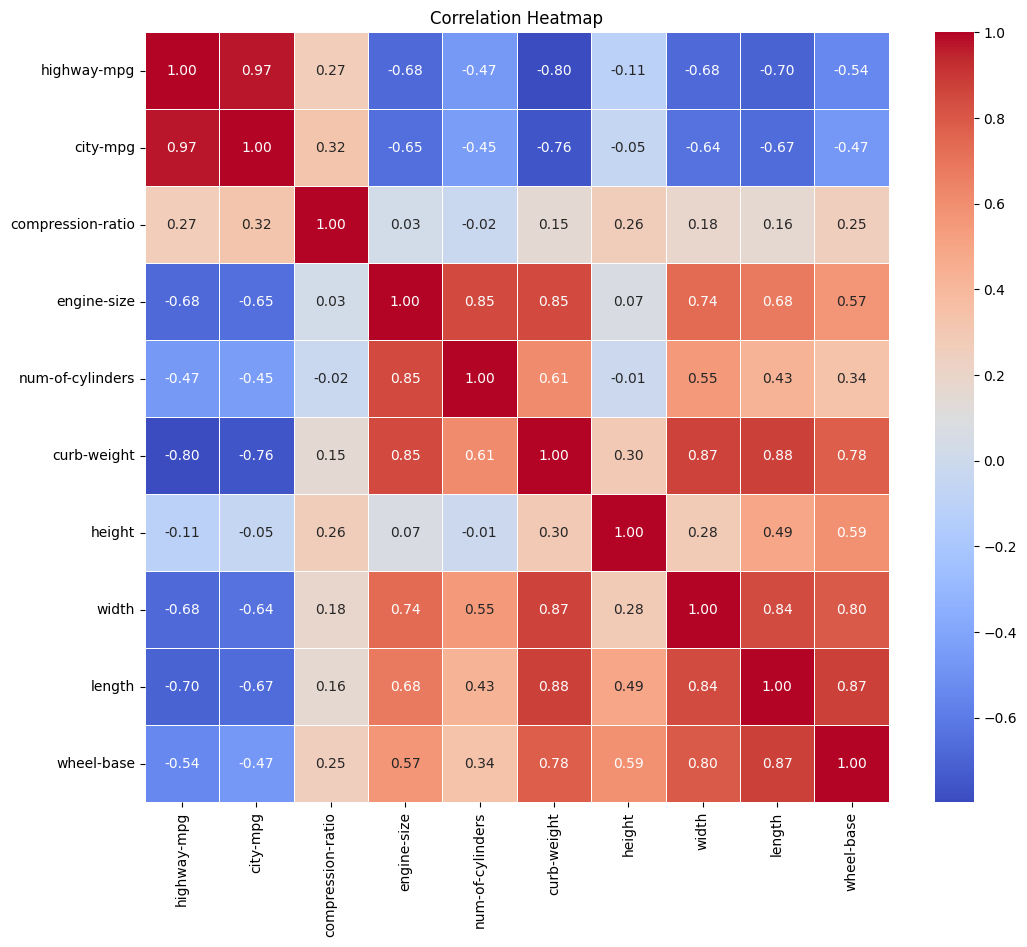

In [199]:
corr_matrix = X.corr()


# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Remove Highly correlated data

In [200]:
# Remove features with correlation higher than 0.65
high_correlation_features = corr_matrix[abs(corr_matrix) > 0.8]
high_correlation_features = high_correlation_features.stack().reset_index()
high_correlation_features = high_correlation_features[high_correlation_features['level_0'] != high_correlation_features['level_1']]
high_correlation_features

,level_0,level_1,0
1,highway-mpg,city-mpg,0.971337
2,city-mpg,highway-mpg,0.971337
6,engine-size,num-of-cylinders,0.846031
7,engine-size,curb-weight,0.850594
8,num-of-cylinders,engine-size,0.846031
10,curb-weight,engine-size,0.850594
12,curb-weight,width,0.867032
13,curb-weight,length,0.877728
15,width,curb-weight,0.867032
17,width,length,0.841118


In [201]:
features_to_remove = ['city-mpg', 'engine-size', 'width', 'length','height', 'wheel-base']
# Drop features with high correlation
df_filtered = X.drop(columns=features_to_remove)

df_filtered.head(10)

,highway-mpg,compression-ratio,num-of-cylinders,curb-weight
0,27,9.0,4,2548
1,27,9.0,4,2548
2,26,9.0,6,2823
3,30,10.0,4,2337
4,22,8.0,5,2824
5,25,8.5,5,2507
6,25,8.5,5,2844
7,25,8.5,5,2954
8,20,8.3,5,3086
9,22,7.0,5,3053


In [240]:
X_plot = pd.DataFrame(np.tile(np.linspace(0, len(df_filtered), len(df_filtered))[:, np.newaxis], (1, 4)), columns=['highway-mpg', 'compression-ratio', 'num-of-cylinders', 'curb-weight'])

X_plot

,highway-mpg,compression-ratio,num-of-cylinders,curb-weight
0,0.000000,0.000000,0.000000,0.000000
1,1.004902,1.004902,1.004902,1.004902
2,2.009804,2.009804,2.009804,2.009804
3,3.014706,3.014706,3.014706,3.014706
4,4.019608,4.019608,4.019608,4.019608
...,...,...,...,...
200,200.980392,200.980392,200.980392,200.980392
201,201.985294,201.985294,201.985294,201.985294
202,202.990196,202.990196,202.990196,202.990196
203,203.995098,203.995098,203.995098,203.995098


### Split data into training and testing sets

In [241]:
X = df_filtered
# X = df_filtered.values
# y = y.values
# X_plot = X_plot.values
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

len(X)

205

In [242]:
# X_train
# y_test.shape
# X_test.shape

In [243]:
# Define kernel
kernel = 1.0 * RBF(length_scale=1.0)
kernel

1**2 * RBF(length_scale=1)

In [244]:
# Train Gaussian Process
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(X, y)

 c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\gaussian_process\_gpr.py:663: ConvergenceWarning:lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
 c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\gaussian_process\kernels.py:445: ConvergenceWarning:The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.


GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=9)

In [263]:
# Evaluate model
y_pred, std = gaussian_process.predict(X_plot, return_std=True)

mse = mean_squared_error(y_pred, std)
mae = mean_absolute_error(y_pred, std)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

std

Mean Squared Error: 95868.08617976462
Mean Absolute Error: 309.62571950625255


array([309.62571951, 309.62571951, 309.62571951, 309.62571951,
       309.62571951, 309.62571951, 309.62571951, 309.62571951,
       309.62571951, 309.62571951, 309.62571951, 309.62571951,
       309.62571951, 309.62571951, 309.62571951, 309.62571951,
       309.62571951, 309.62571951, 309.62571951, 309.62571951,
       309.62571951, 309.62571951, 309.62571951, 309.62571951,
       309.62571951, 309.62571951, 309.62571951, 309.62571951,
       309.62571951, 309.62571951, 309.62571951, 309.62571951,
       309.62571951, 309.62571951, 309.62571951, 309.62571951,
       309.62571951, 309.62571951, 309.62571951, 309.62571951,
       309.62571951, 309.62571951, 309.62571951, 309.62571951,
       309.62571951, 309.62571951, 309.62571951, 309.62571951,
       309.62571951, 309.62571951, 309.62571951, 309.62571951,
       309.62571951, 309.62571951, 309.62571951, 309.62571951,
       309.62571951, 309.62571951, 309.62571951, 309.62571951,
       309.62571951, 309.62571951, 309.62571951, 309.62

In [251]:
# y_mean, y_std = gaussian_process.predict(X, return_std=True)
# y_mean



RangeIndex(start=0, stop=205, step=1)

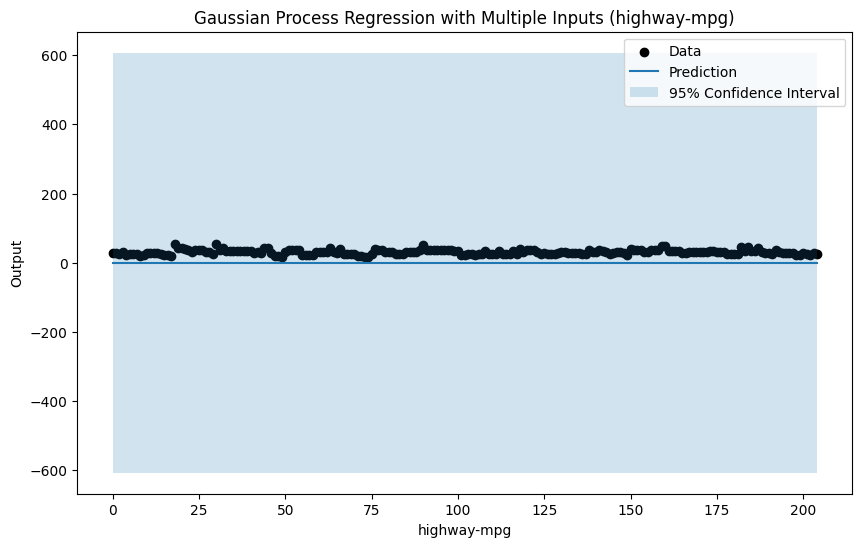

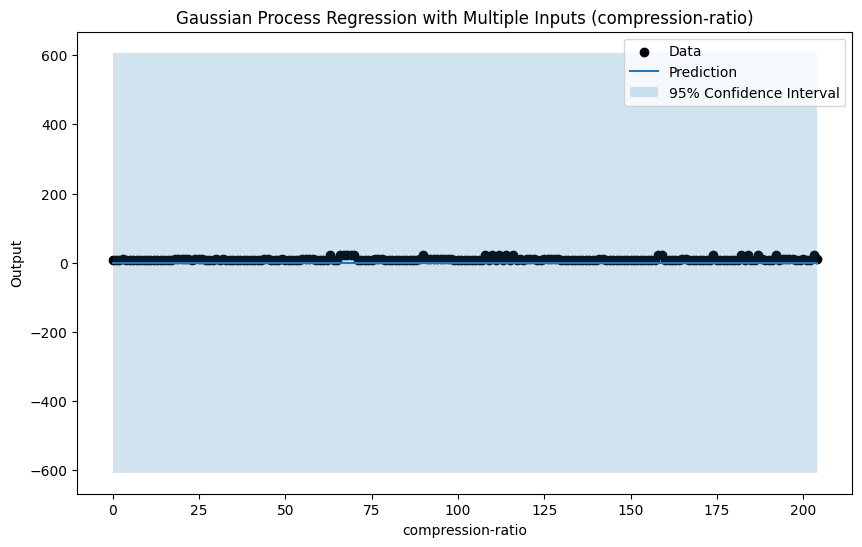

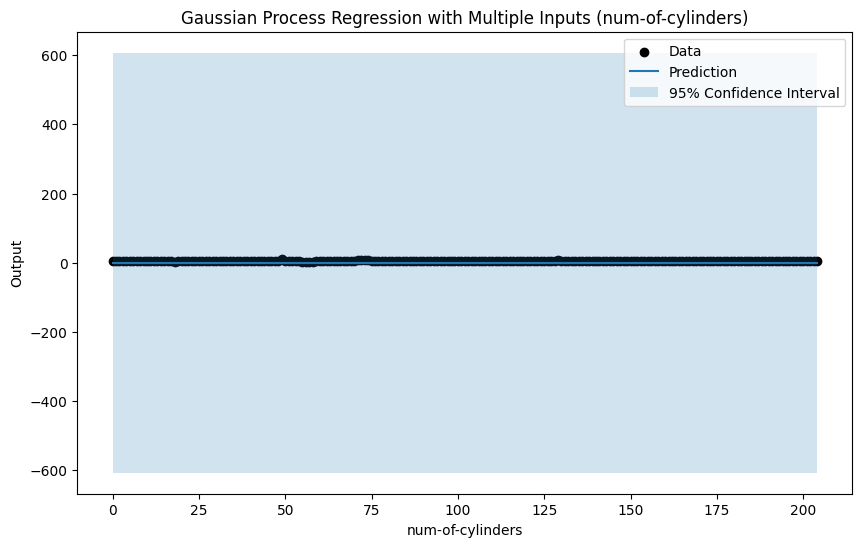

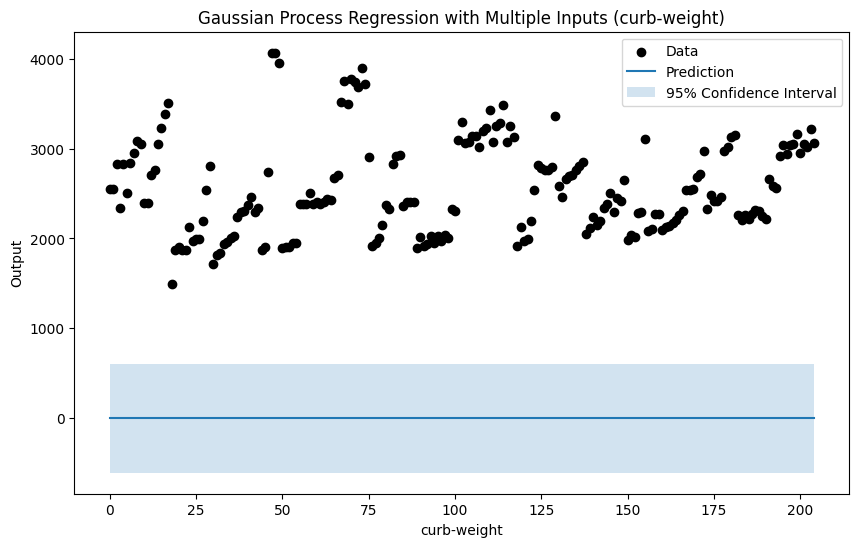

In [265]:
# Loop through all features and plot
for feature in X.columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(X.index, X[feature], c='k', label="Data")
    plt.plot(X.index, y_pred, label="Prediction")
    plt.fill_between(X.index, y_pred - 1.96 * std, y_pred + 1.96 * std, alpha=0.2, label="95% Confidence Interval")
    plt.xlabel(feature)
    plt.ylabel("Output")
    plt.title(f"Gaussian Process Regression with Multiple Inputs ({feature})")
    plt.legend()
    plt.show()

In [210]:
# Plot mean prediction and confidence interval for each feature
for i in range(X.shape[1]):
    feature_label = features_df.columns[i]
    color = plt.cm.viridis(i / X.shape[1])  # Using a colormap to generate different colors
    
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, i], y, c='k', label=feature_label)
    plt.plot(X_plot[:, i], y_pred, 'r', label="Prediction")
    plt.fill_between(X_plot[:, i].ravel(), y_pred - 1.96 * std, y_pred + 1.96 * std, alpha=0.2, label="95% Confidence Interval")
    plt.xlabel(f"{feature_label}")
    plt.ylabel("Output")
    plt.title(f"Gaussian Process Regression with Multiple Inputs - ({feature_label})")
    plt.legend()
    plt.show()

InvalidIndexError: (slice(None, None, None), 0)

<Figure size 1000x600 with 0 Axes>